# Kaufman's Adaptive Moving Average (KAMA)

卡夫曼自适应移动平均也是一种趋势模型，其很好得解决了固定均线模型无法适应不同市场状况的问题。

KAMA根据市场趋势变化速度自主调节，既能够避免震荡行情中的虚假信号，也能消除长期趋势中的滞后性。

在牛市或者熊市中自适应均线紧随指数向上或者向下变化，而市场震荡时期，其变化减弱。

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tushare as ts

In [9]:
szzz = ts.get_hist_data(code = 'sh000001', start='2000-01-01', ktype='D')['close']
szzz = szzz.sort_index()

In [10]:
# KAMA函数
def KAMA(data, er, ma1, ma2):
    data = pd.DataFrame(data)
    # efficiencu ratio
    data['cha'] = np.abs(data.diff(periods=er))
    data['vol'] = np.abs(data['close'].diff(periods=1)).rolling(window=er).sum()
    data['ER'] = data['cha'] / data['vol']
    # smoothing constant
    data['SC'] = (data['ER'] * (2/(ma1 + 1) - 2/(ma2 + 1)) + 2/(ma2 + 1)) ** 2
    # current kama = prior kama + sc * (price - prior kama)
    KAMA = list(np.repeat(np.nan, er-1))
    KAMA.append(data['close'].iloc[0:er].mean())
    for i in data['SC'].dropna().index:
        KAMA.append(KAMA[-1] + data['SC'][i] * (data['close'][i] - KAMA[-1]))
    
    data['KAMA'] = pd.Series(KAMA, index=data.index)
    return data

In [13]:
er = 10
ma1 = 2
ma2 = 30
data = szzz
result = KAMA(data = szzz, er=10, ma1=2, ma2=30)
#result['sign'] = []

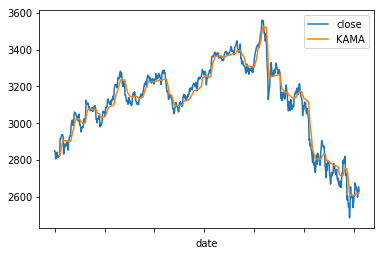

In [16]:
result[['close', 'KAMA']].plot()

pandas.core.indexes.base.Index

In [30]:
sns.timeseries(result[['close','KAMA']])
#sns.lineplot(data = result['close'])
#sns.lineplot(data = result['KAMA'])

TypeError: 'module' object is not callable

In [5]:
result

,close,cha,vol,ER,SC,KAMA
date,,,,,,
2016-05-16,2850.86,NaN,NaN,NaN,NaN,NaN
2016-05-17,2843.68,NaN,NaN,NaN,NaN,NaN
2016-05-18,2807.51,NaN,NaN,NaN,NaN,NaN
2016-05-19,2806.91,NaN,NaN,NaN,NaN,NaN
2016-05-20,2825.48,NaN,NaN,NaN,NaN,NaN
2016-05-23,2843.65,NaN,NaN,NaN,NaN,NaN
2016-05-24,2821.67,NaN,NaN,NaN,NaN,NaN
2016-05-25,2815.09,NaN,NaN,NaN,NaN,NaN
2016-05-26,2822.44,NaN,NaN,NaN,NaN,NaN
